### Name: Amirmahdi Daraei
### StudentId: 99105431

# Librarires

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans as SklearnKMeans

# Load Dataset

In [4]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [5]:
class KMeans:
    def __init__(self, n_clusters=5, max_iterations=2000):
        self.n_clusters = n_clusters
        self.max_iterations = max_iterations
        self.cluster_centers = None
        self.cluster_labels = None

    def fit(self, data):
        np.random.seed(10)
        initial_indices = np.random.permutation(data.shape[0])
        self.cluster_centers = data[initial_indices[:self.n_clusters]]

        for iteration in range(self.max_iterations):
            self.cluster_labels = self._assign_clusters(data)
            updated_centers = self._update_centers(data)
            if np.all(self.cluster_centers == updated_centers):
                break

            self.cluster_centers = updated_centers

    def _assign_clusters(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.cluster_centers, axis=2)
        return np.argmin(distances, axis=1)

    def _update_centers(self, data):
        new_centers = np.zeros((self.n_clusters, data.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = data[self.cluster_labels == i]
            if len(points_in_cluster) > 0:
                new_centers[i] = points_in_cluster.mean(axis=0)
        return new_centers

    def predict(self, data):
        return self._assign_clusters(data)

    def fit_predict(self, data):
        self.fit(data)
        return self.cluster_labels

# Use elbow method and silhouette method to choose optimal cluster numbers

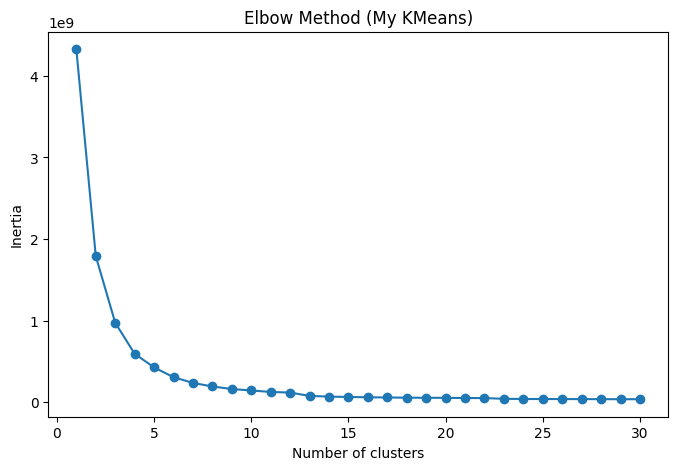

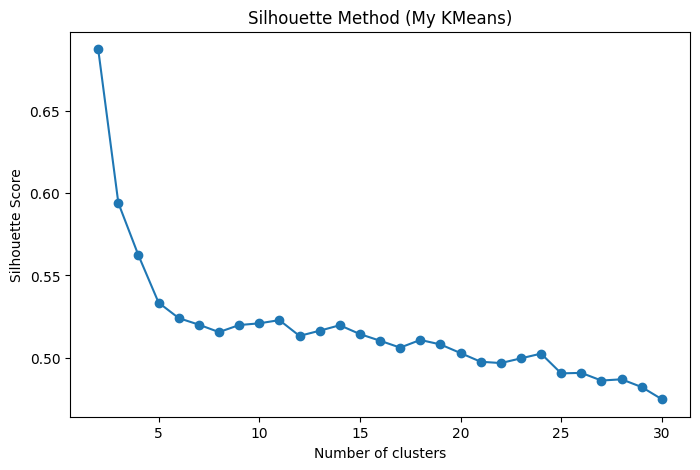

In [6]:
def calculate_inertia(data, labels, centers):
    inertia = 0
    for i, center in enumerate(centers):
        cluster_points = data[labels == i]
        inertia += np.sum((cluster_points - center) ** 2)
    return inertia
    

def elbow_method(data, max_clusters):
    inertias = []

    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia = calculate_inertia(data, kmeans.cluster_labels, kmeans.cluster_centers)
        inertias.append(inertia)

    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.title('Elbow Method (My KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    return inertias


def silhouette_samples(data, labels, centers):
    silhouette_vals = []
    for i in range(data.shape[0]):
        own_cluster = labels[i]
        own_cluster_points = data[labels == own_cluster]
        other_clusters_points = data[labels != own_cluster]

        if len(own_cluster_points) > 1:
            a = np.mean(np.linalg.norm(own_cluster_points - data[i], axis=1))
        else:
            a = 0

        if len(other_clusters_points) > 0:
            b = np.min([np.mean(np.linalg.norm(other_clusters_points[labels[labels != own_cluster] == j] - data[i], axis=1)) for j in range(len(centers)) if j != own_cluster])
        else:
            b = 0

        silhouette_vals.append((b - a) / max(a, b))
    return np.array(silhouette_vals)


def silhouette_method(data, max_clusters):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        silhouette_vals = silhouette_samples(data, kmeans.cluster_labels, kmeans.cluster_centers)
        silhouette_score = np.mean(silhouette_vals)
        silhouette_scores.append(silhouette_score)

    optimal_silhouette = silhouette_scores.index(max(silhouette_scores))
    
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.title('Silhouette Method (My KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()
    return optimal_silhouette

elbows = elbow_method(x_data, max_clusters=30)
optimal_silhouette = silhouette_method(x_data, max_clusters=30)

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

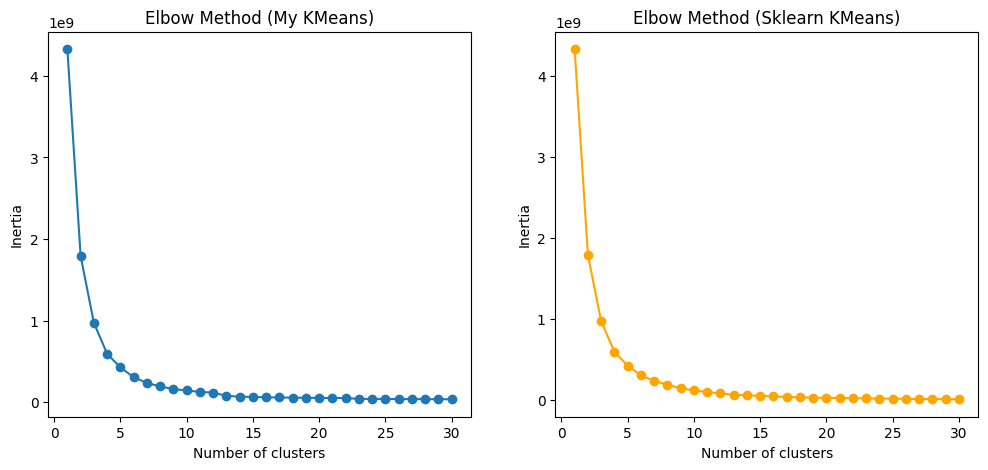

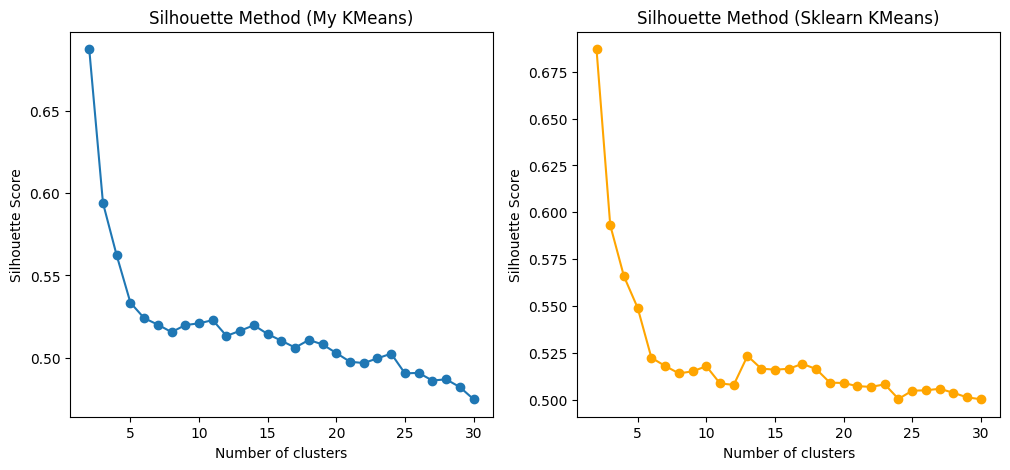

In [7]:
def elbow_method_comparison(data, max_clusters):
    my_inertias = []
    sklearn_inertias = []

    for k in range(1, max_clusters + 1):
        my_kmeans = KMeans(n_clusters=k)
        my_kmeans.fit(data)
        my_inertia = calculate_inertia(data, my_kmeans.cluster_labels, my_kmeans.cluster_centers)
        my_inertias.append(my_inertia)
        
        sklearn_kmeans = SklearnKMeans(n_clusters=k, random_state=10)
        sklearn_kmeans.fit(data)
        sklearn_inertias.append(sklearn_kmeans.inertia_)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(1, max_clusters + 1), my_inertias, marker='o', label='My KMeans')
    plt.title('Elbow Method (My KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

    plt.subplot(1, 2, 2)
    plt.plot(range(1, max_clusters + 1), sklearn_inertias, marker='o', label='Sklearn KMeans', color='orange')
    plt.title('Elbow Method (Sklearn KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    
    plt.show()


def silhouette_method_comparison(data, max_clusters):
    my_silhouette_scores = []
    sklearn_silhouette_scores = []

    for k in range(2, max_clusters + 1):
        my_kmeans = KMeans(n_clusters=k)
        my_kmeans.fit(data)
        my_silhouette_vals = silhouette_samples(data, my_kmeans.cluster_labels, my_kmeans.cluster_centers)
        my_silhouette_score = np.mean(my_silhouette_vals)
        my_silhouette_scores.append(my_silhouette_score)
        
        sklearn_kmeans = SklearnKMeans(n_clusters=k, random_state=10)
        sklearn_kmeans_labels = sklearn_kmeans.fit_predict(data)
        sklearn_silhouette_score = silhouette_score(data, sklearn_kmeans_labels)
        sklearn_silhouette_scores.append(sklearn_silhouette_score)
    
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), my_silhouette_scores, marker='o', label='My KMeans')
    plt.title('Silhouette Method (My KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')

    plt.subplot(1, 2, 2)
    plt.plot(range(2, max_clusters + 1), sklearn_silhouette_scores, marker='o', label='Sklearn KMeans', color='orange')
    plt.title('Silhouette Method (Sklearn KMeans)')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    
    plt.show()
    
    my_optimal_silhouette = my_silhouette_scores.index(max(my_silhouette_scores))
    sklearn_optimal_silhouette = sklearn_silhouette_scores.index(max(sklearn_silhouette_scores))
    return my_optimal_silhouette, sklearn_optimal_silhouette

elbow_method_comparison(x_data, max_clusters=30)
my_optimal_silhouette, sklearn_optimal_silhouette = silhouette_method_comparison(x_data, max_clusters=30)

### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference
 
According to each time the code is run, different samples are created, usually 2 clusters and sometimes 3 clusters are the optimal answer.

As it is clear in the plots, both algorithms have almost the same but are slightly different performance however in both of them there is a descending graph silhouette and final results are same approximately.


but these two implementations are different in these metrics:

- Initialization: Custom KMeans uses simple random initialization, while sklearn KMeans offers 'k-means++' for better initialization.
- Stopping Criterion: Custom KMeans stops based on iteration count or no change in centers; sklearn KMeans also includes a tolerance level.
- Performance: Sklearn KMeans is optimized and supports parallel computation, making it faster and more efficient for large datasets.
- Features: Sklearn KMeans provides more features and flexibility, such as different initialization methods and parallel computation.
- Usability: Sklearn KMeans is more user-friendly and convenient for practical use, while the custom implementation is beneficial for educational purposes and understanding the algorithm.

Both implementations serve their purposes well, with the custom implementation being a great educational tool and sklearn's implementation being the go-to for practical and efficient use in real-world applications.

### would you prefer elbow method for determining optimal cluster number or silhouette method?

I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method
But about this dataset, silhouette is not an ideal metric too because the dataset is not handy and as you can see, the silhouette plot is a descending one.